In [29]:
from subprocess import check_output
import re
import numpy as np
import pandas as pd
import seaborn as sn
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [47]:
def run_once(p,max_t,max_cte):
    '''parse the results'''
    
    result  = str(check_output(['./build/pid',str(p[0]),str(p[1]),str(p[2]),str(max_t),str(max_cte)]))
    
    data=[]
    cols=None
    for l in result.split('\\n'):
        if len(l) < 50:
            continue

        a = l.split(' ')
        if cols is None:
            cols = [a[i] for i in range(len(a)) if i%2==0]

        data.append([float(a[i]) for i in range(len(a)) if i%2==1])

    df = pd.DataFrame(data, columns = list(map(lambda x: x.replace(':','').strip(), cols)))
    
    #kick out bogus readings
    return df[df.cte.apply(lambda x: np.abs(x)< 10)]

def score(df):
    return np.mean(df.cte**2)

In [ ]:
#p=[.115,.02, .09]
p=[0.7308569492165553, 0.1338155374232569, 0.3593786299378923]
df = run_once(p, 3000, 3.0)

In [57]:
df.head()

,cte,speed,angle,throttle,new_angle,new_throttle,pe,de,ie
2,0.7598,0.438,0.0000,0.0000,0.500000,0.200000,-0.555305,54.188300,-0.073081
3,0.7598,0.876,0.0000,0.0000,0.500000,0.200000,-0.555305,16.256500,-0.075700
4,0.7598,1.314,12.9363,0.2000,0.758726,0.096510,-0.555305,4.876940,-0.077902
5,0.7598,1.752,12.9363,0.2000,0.672483,0.131007,-0.555305,1.463080,-0.080264
6,0.7598,2.190,19.4045,0.0965,0.288627,0.284549,-0.555305,0.438925,-0.082545


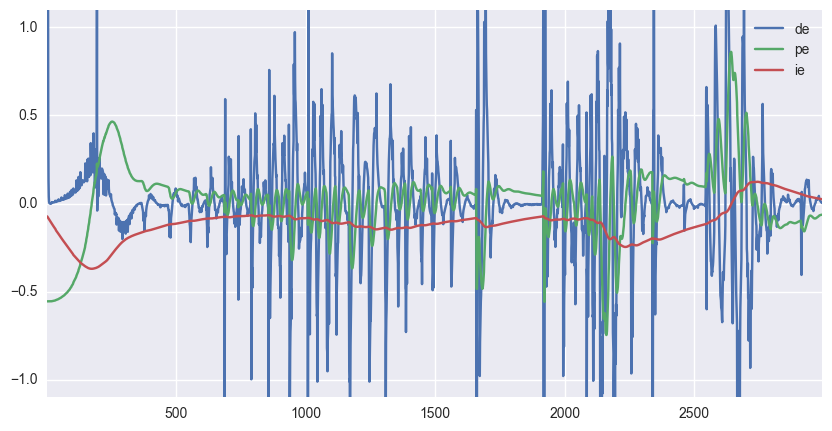

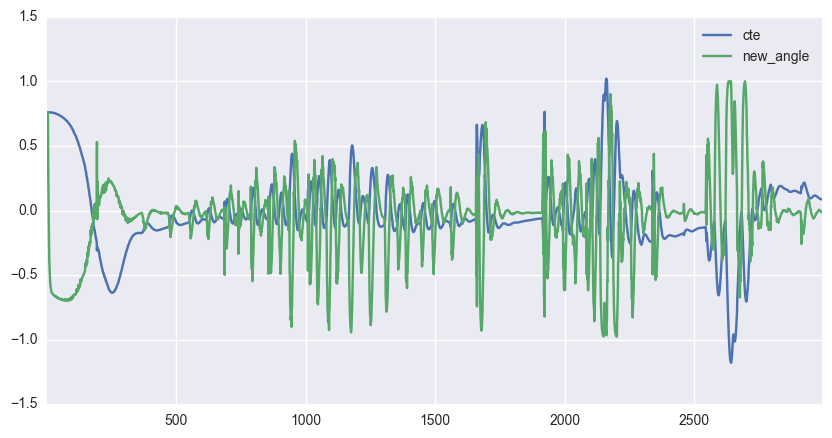

In [58]:
figure(figsize(10,5))
df[['de','pe','ie']].plot()
ylim(-1.1,1.1)

figure(figsize(10,5))
df[['cte','new_angle']].plot()

In [53]:
def twiddle(tol=.02,n=1): 
    #p = [0, 0,0]
    p=[.115,.02, .09]
    dp = [.1, .1,.1]
    max_t = 3000
    max_err = 3.0
    
    best_err = score(run_once(p, max_t, max_err))
    print(p,dp,best_err)
    
    it = 0
    while sum(dp) > tol:
        print(sum(dp))
        print("Iteration {}, best error = {}".format(it, best_err))
        for i in range(len(p)):
            p[i] += dp[i]
            
            err = score(run_once(p, max_t, max_err))
            print(p,dp,err)
            

            if err < best_err:
                best_err = err
                dp[i] *= 1.2
            else:
                p[i] -= 2 * dp[i]
                
                err = score(run_once(p, max_t, max_err))
                print(p,dp,err)

                if err < best_err:
                    best_err = err
                    dp[i] *= 1.2
                else:
                    p[i] += dp[i]
                    dp[i] *= 0.8
        it += 1
    return p

In [55]:
#0.015000000000000013, 0.020000000000000004, 0.17099999999999999
twiddle(.02)

[0.115, 0.02, 0.09] [0.1, 0.1, 0.1] 0.4246877512946274
0.3
Iteration 0, best error = 0.4246877512946274
[0.21500000000000002, 0.02, 0.09] [0.1, 0.1, 0.1] 0.24096753516688926
[0.21500000000000002, 0.12000000000000001, 0.09] [0.12, 0.1, 0.1] 0.26195505895861076
[0.21500000000000002, -0.08, 0.09] [0.12, 0.1, 0.1] 1.9122372364126996
[0.21500000000000002, 0.020000000000000004, 0.19] [0.12, 0.08000000000000002, 0.1] 0.27084244709181987
[0.21500000000000002, 0.020000000000000004, -0.010000000000000009] [0.12, 0.08000000000000002, 0.1] 1.6935711311961719
0.28
Iteration 1, best error = 0.24096753516688926
[0.335, 0.020000000000000004, 0.09] [0.12, 0.08000000000000002, 0.08000000000000002] 0.30572585952237813
[0.09500000000000003, 0.020000000000000004, 0.09] [0.12, 0.08000000000000002, 0.08000000000000002] 0.5286430182655113
[0.21500000000000002, 0.10000000000000002, 0.09] [0.096, 0.08000000000000002, 0.08000000000000002] 0.24740034265353766
[0.21500000000000002, -0.06000000000000001, 0.09] [0.0

[0.7308569492165553, 0.1338155374232569, 0.3593786299378923]

In [ ]:
p=[0.7308569492165553, 0.1338155374232569, 0.3593786299378923]